#### [1] Importing Libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### [2] Data Loading

In [81]:
df = pd.read_csv('../data/housing.csv')

#### [3] Data preparation

In [82]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [84]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [85]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [86]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [87]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [88]:
df['total_bedrooms'].fillna(538, inplace=True)

In [89]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### [4] Exploratory Data Analysis

In [90]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [91]:
for cols in df.columns:
    print(cols)
    print(df[cols].unique()[:5])
    print(df[cols].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5



In [92]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [93]:
numerical_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

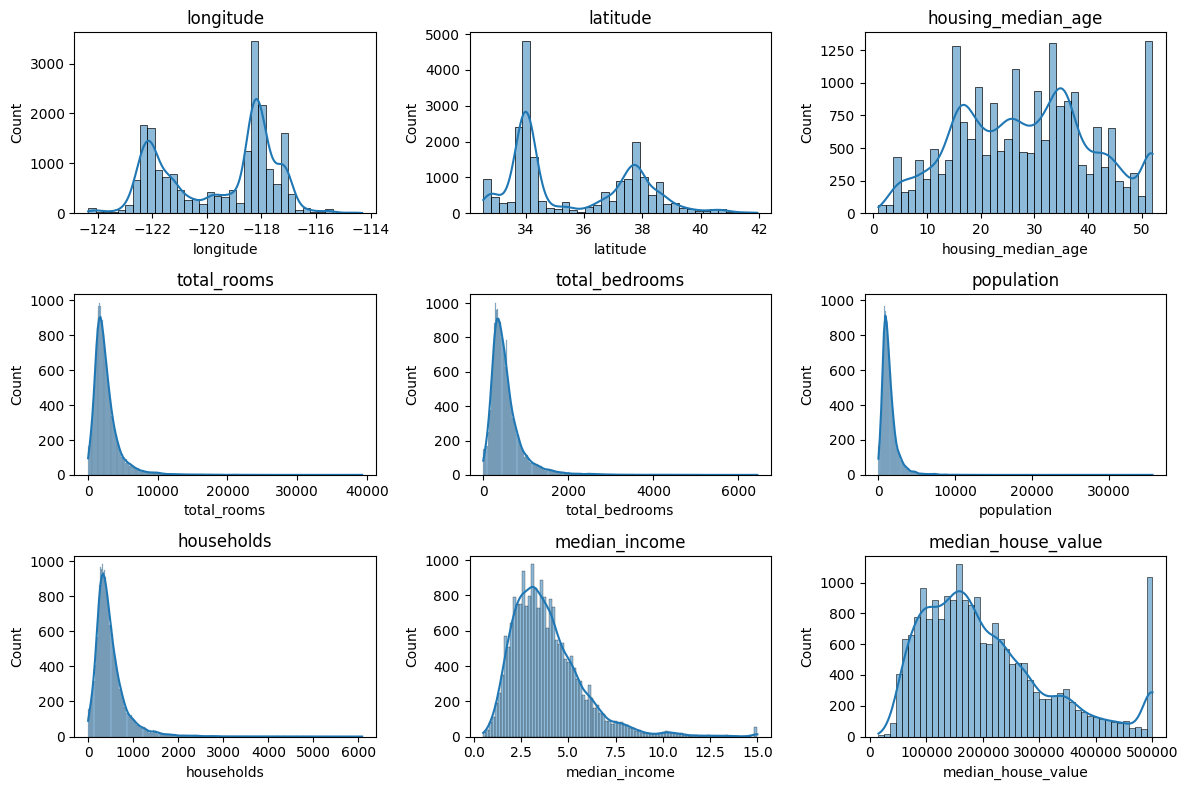

In [94]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

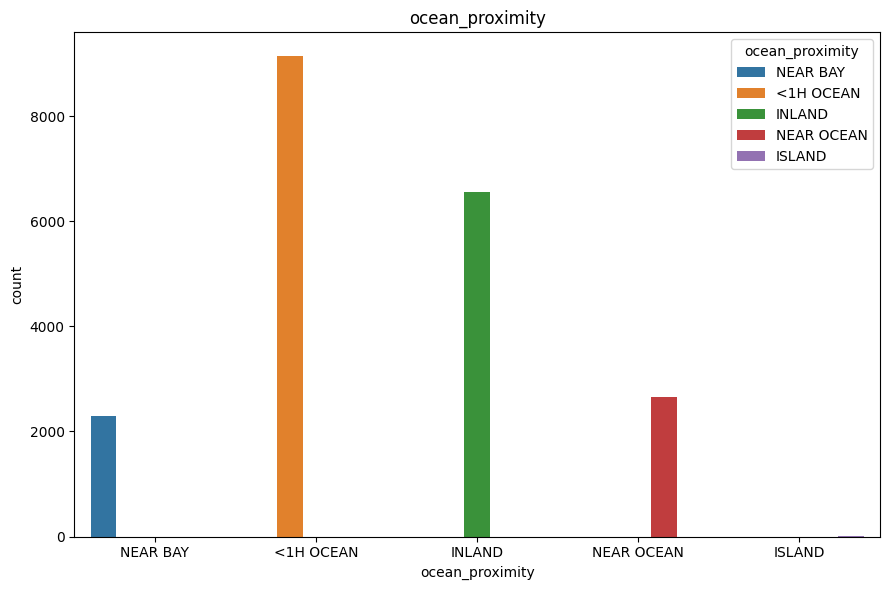

In [95]:
categorical_cols = ['ocean_proximity']

plt.figure(figsize=(9, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 1, i + 1)
    sns.countplot(x=col, hue='ocean_proximity', data=df)
    plt.title("ocean_proximity")
plt.tight_layout()
plt.show()

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

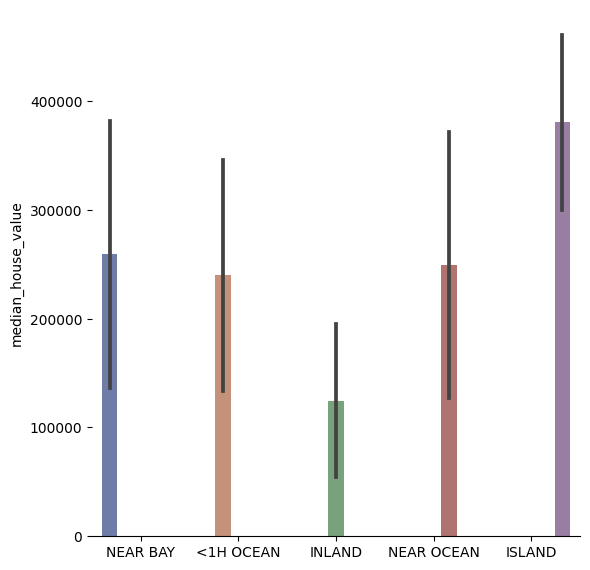

In [96]:
g = sns.catplot(
    data=df, kind="bar",
    x="ocean_proximity", y="median_house_value", hue="ocean_proximity",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "median_house_value")

In [97]:
df.groupby('ocean_proximity').size()
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN" : 0, "INLAND":1, "ISLAND":2, "NEAR BAY":3, "NEAR OCEAN":4})

In [98]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


#### [5] Setting up the validation framework

In [99]:
# length of data
n = len(df)

In [100]:
n

20640

In [101]:
# splitting the data into validation, test and training data
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [102]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [103]:
# using iloc to preview your data
df.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [104]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [105]:
idx = np.arange(n)

In [106]:
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [107]:
# shuffling data and seeding it to avoid reshuffling of data
np.random.seed(2)
np.random.shuffle(idx)

In [108]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [109]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10385,-117.65,33.60,15.0,5736.0,538.0,2529.0,762.0,6.4114,278700.0,0
1943,-120.91,38.62,12.0,4545.0,748.0,2033.0,718.0,4.1843,207600.0,1
7490,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,96700.0,0
16889,-122.37,37.59,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,353800.0,4
11416,-117.98,33.70,16.0,5127.0,631.0,2142.0,596.0,7.8195,390500.0,0
...,...,...,...,...,...,...,...,...,...,...
10901,-117.83,33.74,23.0,1818.0,522.0,958.0,485.0,2.6771,131500.0,0
14426,-117.25,32.80,32.0,1601.0,468.0,731.0,429.0,2.5568,258300.0,4
16877,-122.40,37.60,52.0,1380.0,203.0,530.0,210.0,6.2210,420300.0,4
15999,-122.47,37.75,52.0,1598.0,285.0,689.0,265.0,4.6071,337400.0,3


In [110]:
# resetting your index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [111]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.65,33.60,15.0,5736.0,538.0,2529.0,762.0,6.4114,278700.0,0
1,-120.91,38.62,12.0,4545.0,748.0,2033.0,718.0,4.1843,207600.0,1
2,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,96700.0,0
3,-122.37,37.59,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,353800.0,4
4,-117.98,33.70,16.0,5127.0,631.0,2142.0,596.0,7.8195,390500.0,0
...,...,...,...,...,...,...,...,...,...,...
12379,-117.83,33.74,23.0,1818.0,522.0,958.0,485.0,2.6771,131500.0,0
12380,-117.25,32.80,32.0,1601.0,468.0,731.0,429.0,2.5568,258300.0,4
12381,-122.40,37.60,52.0,1380.0,203.0,530.0,210.0,6.2210,420300.0,4
12382,-122.47,37.75,52.0,1598.0,285.0,689.0,265.0,4.6071,337400.0,3


In [112]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [113]:
y_train

array([12.5378948 , 12.24337325, 11.47937902, ..., 12.9487264 ,
       12.72902741, 12.88790859])

In [114]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

#### [6] Linear Regression

In [115]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-117.65,33.60,15.0,5736.0,538.0,2529.0,762.0,6.4114,0
1,-120.91,38.62,12.0,4545.0,748.0,2033.0,718.0,4.1843,1
2,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,0
3,-122.37,37.59,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,4
4,-117.98,33.70,16.0,5127.0,631.0,2142.0,596.0,7.8195,0


In [116]:
df_train.iloc[10]

longitude             -117.9900
latitude                33.6600
housing_median_age      14.0000
total_rooms           3155.0000
total_bedrooms         653.0000
population             951.0000
households             575.0000
median_income            3.0625
ocean_proximity          0.0000
Name: 10, dtype: float64

In [117]:
xi = [3215, 725, 2400]

In [118]:
w0  = 7.17 
w = [0.01, 0.04, 0.002]

In [119]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [120]:
linear_regression(xi)

73.11999999999999

In [121]:
np.expm1(73.11999999999999)

5.696557911075945e+31

#### [7] Linear Regression: Vectorization

In [122]:
def dot(xi ,w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [123]:
w_new = [w0] +w

In [124]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [125]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [126]:
linear_regression(xi)

73.11999999999999

In [127]:
wo = 7.17
w = [0.01, 0.04, 0.002]
w_new = [wo] + w

In [128]:
x1 = [1, 2000, 600, 2400]
x2 = [1, 1500, 300, 2031]
x10 = [1, 1234, 432, 3000]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1, 2000,  600, 2400],
       [   1, 1500,  300, 2031],
       [   1, 1234,  432, 3000]])

In [129]:
def Linear_regression(X):
    return X.dot(w_new)

In [130]:
Linear_regression(X)

array([55.97 , 38.232, 42.79 ])

#### [8] Training a Linear Regression model

In [131]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

#### [9] House Price Baseline Model

In [132]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [133]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']

In [134]:
X_train = df_train[base].values

In [135]:
df_train[base].isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [136]:
w0, w = train_linear_regression(X_train, y_train)

In [137]:
y_pred = w0 + X_train.dot(w)

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: ylabel='Count'>

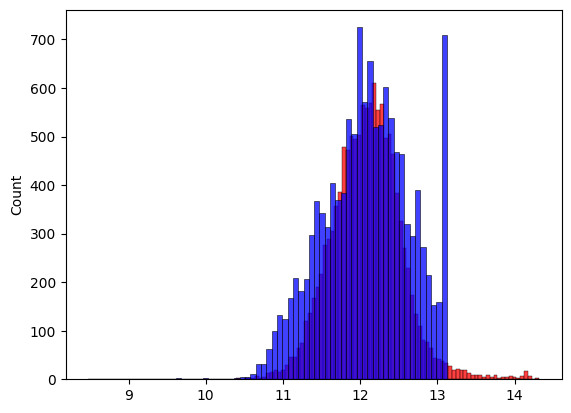

In [138]:
sns.histplot(y_pred, color='red')
sns.histplot(y_train, color='blue')

#### [10] RMSE

In [139]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [140]:
rmse(y_train, y_pred)

0.3408342880267635

#### [11] Validating the model

In [141]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [142]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3310677947348822

#### [12] Regularization

In [143]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [144]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [145]:
XTX = XTX + 0.01 * np.eye(3)

In [146]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [147]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [148]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.33107657891751496

#### [13] Tuning the model

In [149]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -12.510276201540355 0.3310677947348822
1e-05 -12.510093926473882 0.33106780101818944
0.0001 -12.508453694489214 0.33106785781446213
0.001 -12.492074991200374 0.3310684486522833
0.1 -10.919264082994935 0.3313258204993635
1 -5.090632507569112 0.3357123402349139
10 -0.8009525026817008 0.3422982803250192


In [150]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.3310684486522833

#### [14] Using the model

In [151]:
df_full_train = pd.concat([df_train, df_val])

In [152]:
df_full_train = df_full_train.reset_index(drop=True)

In [153]:
X_full_train = prepare_X(df_full_train)

In [154]:
X_full_train

array([[-117.65  ,   33.6   ,   15.    , ...,  762.    ,    6.4114,
           0.    ],
       [-120.91  ,   38.62  ,   12.    , ...,  718.    ,    4.1843,
           1.    ],
       [-118.23  ,   33.93  ,   35.    , ...,  214.    ,    1.7411,
           0.    ],
       ...,
       [-118.12  ,   34.69  ,   17.    , ...,  363.    ,    4.6417,
           1.    ],
       [-121.68  ,   39.29  ,   29.    , ...,  365.    ,    1.5281,
           1.    ],
       [-121.97  ,   37.52  ,   23.    , ...,  894.    ,    5.0824,
           0.    ]])

In [155]:
y_full_train = np.concatenate([y_train, y_val])


In [156]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [157]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.34680539801714405

In [158]:
car = df_test.iloc[20].to_dict()
car

{'longitude': -117.4,
 'latitude': 34.01,
 'housing_median_age': 25.0,
 'total_rooms': 1858.0,
 'total_bedrooms': 366.0,
 'population': 1311.0,
 'households': 331.0,
 'median_income': 2.7083,
 'ocean_proximity': 1.0}

In [159]:
df_small = pd.DataFrame([car])
df_small

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-117.4,34.01,25.0,1858.0,366.0,1311.0,331.0,2.7083,1.0


In [160]:
X_small = prepare_X(df_small)

In [161]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

11.637692706567977

In [162]:
np.expm1(y_pred)

113287.47339359892

In [163]:

np.expm1(y_test[20])

87799.99999999994